# I-94 Traffic Indicators

In this project, we will be visualizing heavy traffic indicators that occur on I-94, we will be using pandas, matplotlib, and seaborn

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

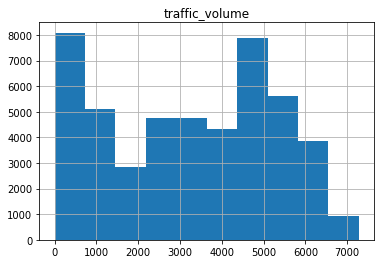

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
#import seaborn as sns

metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(metro.head())
print(metro.tail())
metro.hist('traffic_volume')
metro['date_time'] = pd.to_datetime(metro['date_time'])
metro.info()
plt.show()

In [18]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

It seems that traffic volume averages out to be around 3260 per hour, and that the distribution looks almost binomial in shape.

In [19]:
daytime = metro[metro['date_time'].dt.hour.between(7,18)]
nighttime = metro[metro['date_time'].dt.hour.between(0,6) | metro['date_time'].dt.hour.between(19,23)]

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

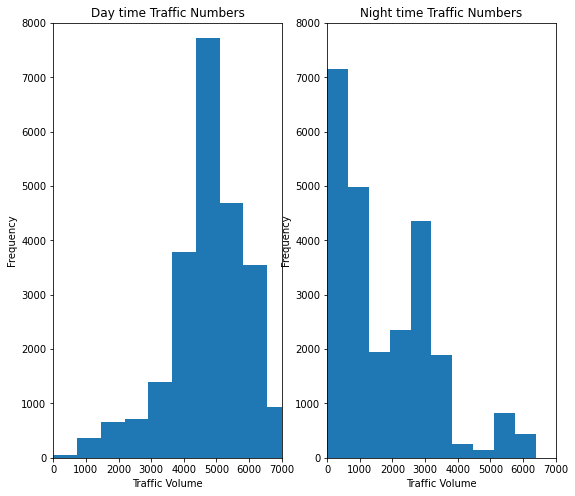

In [20]:
plt.figure(figsize=(9,8))

plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title('Day time Traffic Numbers')
plt.ylim((0,8000))
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim((0,7000))
plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.title('Night time Traffic Numbers')
plt.ylim((0,8000))
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim((0,7000))

print(daytime['traffic_volume'].describe())
nighttime['traffic_volume'].describe()



The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

In [21]:
daytime.insert(9,'month', daytime['date_time'].dt.month)
monthly_traffic = daytime.groupby('month').mean()
monthly_traffic = monthly_traffic['traffic_volume']

<AxesSubplot:xlabel='month'>

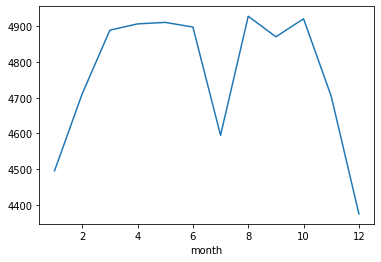

In [22]:
monthly_traffic.plot()

In [23]:
daytime.insert(10,'day_of_week', daytime['date_time'].dt.dayofweek)
daytime.insert(11,'hour', daytime['date_time'].dt.hour)
daily_traffic = daytime.groupby('day_of_week').mean()
daily_traffic = daily_traffic['traffic_volume']

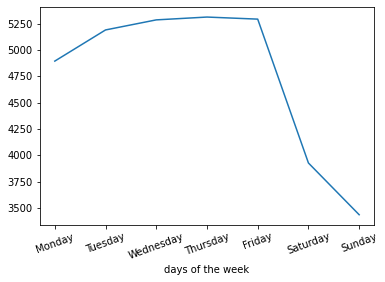

In [24]:
plt.plot(daily_traffic)
plt.xlabel('days of the week');
plt.xticks([0,1,2,3,4,5,6], ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 20);

In [25]:
bussiness_days = daytime[daytime['day_of_week'] <= 4]
weekend = daytime[daytime['day_of_week'] > 4]
bussiness_days_hours = bussiness_days.groupby('hour').mean()['traffic_volume']
weekend_hours = weekend.groupby('hour').mean()['traffic_volume']

hours = [bussiness_days_hours, weekend_hours]
titles = ['Traffic vol by buisness day', 'Traffic vol by weekend']



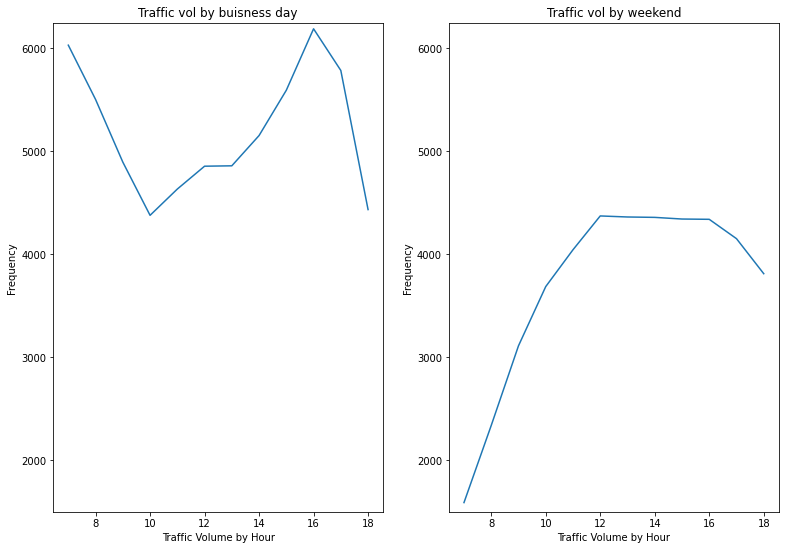

In [26]:
plt.figure(figsize = (13,9))
for i, hour, title in zip(range(1,3),hours,titles):
    plt.subplot(1,2,i)
    plt.plot(hour)
    plt.xlabel('Traffic Volume by Hour')
    plt.ylabel('Frequency')
    plt.ylim((1500,6250))
    plt.title(title)
    
plt.show()

temp          0.130299
rain_1h       0.004714
snow_1h       0.000733
clouds_all    0.067054
Name: traffic_volume, dtype: float64


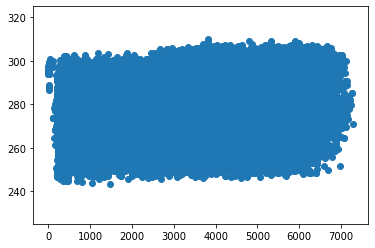

In [27]:
print(metro.corr()['traffic_volume'].drop('traffic_volume'))

plt.scatter(metro['traffic_volume'],metro['temp'])
plt.ylim(225,325)
plt.show()

None of the indicators are that strong to predict traffic volume

In [28]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

Text(0, 0.5, 'Type of weather')

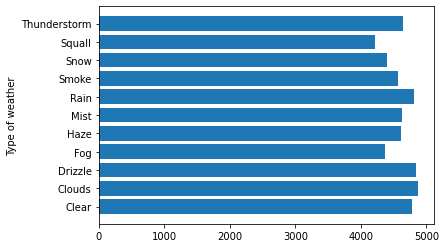

In [29]:
plt.barh(by_weather_main.index.values,by_weather_main['traffic_volume'])
plt.ylabel('Type of weather')

Text(0, 0.5, 'Type of weather')

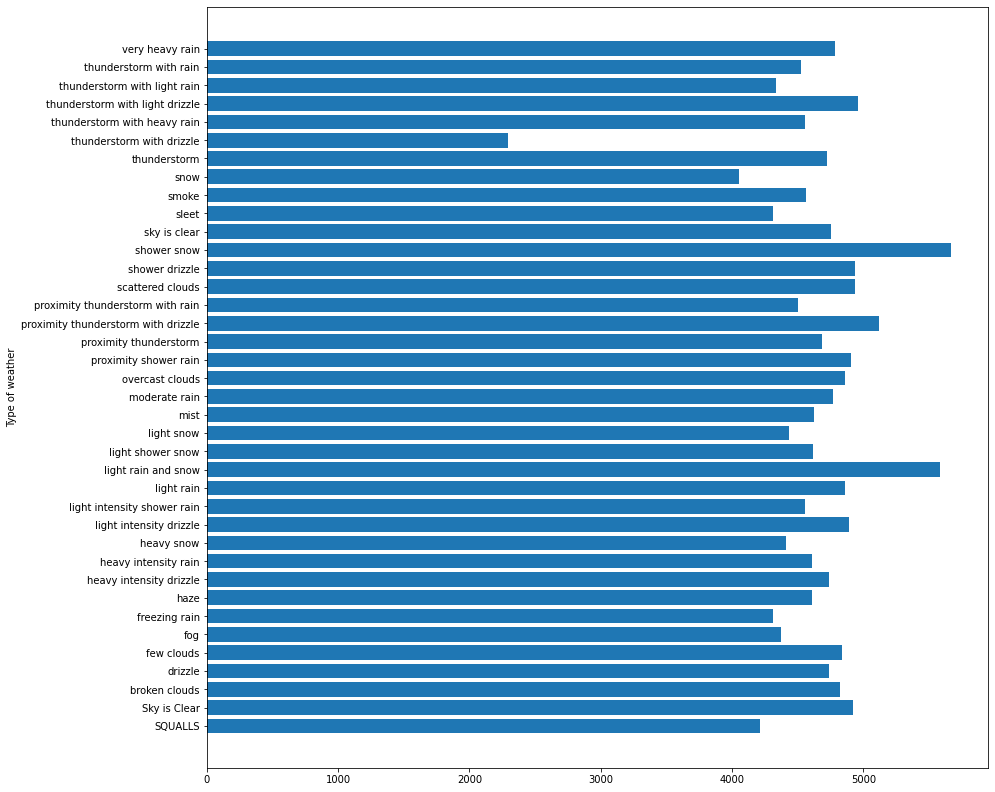

In [30]:
plt.figure(figsize = (14,14))


plt.barh(by_weather_description.index.values,by_weather_description['traffic_volume'])
plt.ylabel('Type of weather')


It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.
---
# Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle